In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal,permutation
import pandas as pd
from pandas import DataFrame,Series

C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

In [3]:
np.random.seed(19961123)

n0, mu0,variance0 = 196,[10,11],196
data0 = multivariate_normal(mu0 , np.eye(2)*variance0,n0)
df0 = DataFrame(data0,columns=['x1','x2'])
df0['t'] = 0

In [4]:
n1,mu1,variance1 = 84, [20,22],86
data1 = multivariate_normal(mu1 , np.eye(2)*variance1,n1)
df1 = DataFrame(data1,columns=['x1','x2'])
df1['t']=1

In [5]:
df = pd.concat([df0,df1],ignore_index=True)

In [6]:
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [7]:
train_set

,x1,x2,t
0,37.442863,-0.788549,0
1,24.028148,14.187292,1
2,9.857511,7.253111,0
3,21.607472,19.421769,1
4,3.058056,41.673803,0
5,-1.114199,30.497976,0
6,9.282767,9.474377,0
7,16.752899,25.795445,1
8,33.070880,11.375793,0
9,24.140785,10.469760,1


In [8]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set),1])

In [9]:
train_x

array([[ 37.44286318,  -0.7885486 ],
       [ 24.02814771,  14.18729213],
       [  9.8575105 ,   7.25311125],
       [ 21.60747244,  19.42176858],
       [  3.05805599,  41.67380316],
       [ -1.11419932,  30.49797616],
       [  9.2827668 ,   9.47437744],
       [ 16.75289932,  25.79544454],
       [ 33.07087952,  11.37579277],
       [ 24.14078493,  10.46975979],
       [ 30.99324807,   2.39846987],
       [ 37.66519432, -17.04778136],
       [-12.56943445,   4.10625332],
       [-10.06706647, -18.19837974],
       [ -8.74093573,   9.58171818],
       [ 21.29969452,  19.90463428],
       [ 21.44024575,   7.99148228],
       [ 20.46330979,  23.18461312],
       [ -1.7993742 ,   4.23227908],
       [ 13.42374147,  45.29449437],
       [ -3.35263437,   8.48216739],
       [ 31.90564868,   8.66280768],
       [  8.42065372,  -1.06757584],
       [ 22.98631506,  33.19470691],
       [ 14.89407167,   4.24022071],
       [ 21.98574339,  43.31516063],
       [ 14.46865841,  15.19602169],
 

In [10]:
train_t

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [11]:
x = tf.placeholder(tf.float32,[None,2])
w = tf.Variable(tf.zeros([2,1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x,w)+w0
p = tf.sigmoid(f)
t = tf.placeholder(tf.float32,[None,1])

In [12]:
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5),tf.sign(t-0.5))

In [13]:
accuacy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
i = 0
for _ in range(20000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 2000 == 0:
        loss_val, acc_val = sess.run(
            [loss,accuacy], feed_dict={x:train_x, t:train_t})
        print ('Step:%d, Loss:%f , Accuacy:%f' 
               % (i, loss_val, acc_val))

InternalError: Blas GEMV launch failed:  m=2, n=280
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Placeholder_0_0/_3, Variable/read)]]

Caused by op 'MatMul', defined at:
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-be5448356ae4>", line 4, in <module>
    f = tf.matmul(x,w)+w0
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2108, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4492, in mat_mul
    name=name)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\tensorflow\python\framework\ops.py", line 3290, in create_op
    op_def=op_def)
  File "C:\Users\Makuwo\Anaconda3\envs\makuwo\lib\site-packages\tensorflow\python\framework\ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMV launch failed:  m=2, n=280
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Placeholder_0_0/_3, Variable/read)]]


In [15]:
w0_val, w_val= sess.run([w0,w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print (w0_val, w1_val, w2_val)

-2.7634313 0.066666 0.05182162


<IPython.core.display.Javascript object>


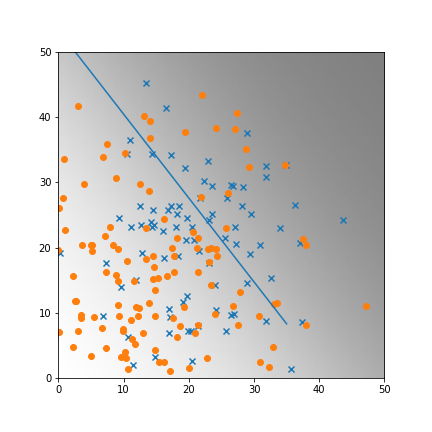

In [24]:
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,50])
subplot.set_xlim([0,50])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

linex = np.linspace(0, 35, 10)
liney = - (w1_val*linex/w2_val+w0_val/w2_val)
subplot.plot(linex,liney)

field = [[(1/(1+np.exp(-(w0_val+w1_val*x1+w2_val*x2))))#スターとプラス注意
          for x1 in np.linspace(0,50,100)]
         for x2 in np.linspace(0,50,100)]
subplot.imshow(field, origin = 'lower', extent=(0,50,0,50), 
               cmap= plt.cm.gray_r, alpha=0.5)